# ![](https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/articles/health_tools/did_you_know_this_could_lead_to_heart_disease_slideshow/493ss_thinkstock_rf_heart_illustration.jpg) Modeling Cardiovascular Diseases...

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   #importing libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
# import LinearSVC
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, \
recall_score, precision_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error 

### Importing Dataset

datasource : https://chronicdata.cdc.gov/Heart-Disease-Stroke-Prevention/National-Vital-Statistics-System-NVSS-National-Car/kztq-p2jf

In [3]:
stroke = pd.read_csv('./datasets/stroke.csv') #importing the dataset

In [4]:
stroke.head()

,Year,LocationAbbr,LocationDesc,Category,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,LowConfidenceLimit,...,Break_Out_Non-Hispanic White,Break_Out_Other,Break_Out_Overall,Topic_Acute Myocardial Infarction (Heart Attack),Topic_Coronary Heart Disease,Topic_Diseases of the Heart (Heart Disease),Topic_Heart Failure,Topic_Major Cardiovascular Disease,Topic_Stroke,AvgConfidenceLimit
0,2013,IL,Illinois,Cardiovascular Diseases,Stroke,Rate of ischemic stroke mortality among US adu...,0,"Rate per 100,000",30.0,30.0,...,0,0,0,0,0,0,0,0,1,1.000000
1,2000,MT,Montana,Cardiovascular Diseases,Major Cardiovascular Disease,Rate of major cardiovascular disease mortality...,0,"Rate per 100,000",362.3,358.6,...,0,1,0,0,0,0,0,1,0,0.806205
2,2001,KS,Kansas,Cardiovascular Diseases,Stroke,Rate of ischemic stroke mortality among US adu...,1,"Rate per 100,000",24.1,23.5,...,0,0,0,0,0,0,0,0,1,0.679191
3,2004,AL,Alabama,Cardiovascular Diseases,Stroke,Rate of ischemic stroke mortality among US adu...,1,"Rate per 100,000",1.6,1.6,...,0,0,0,0,0,0,0,0,1,0.640000
4,2002,OH,Ohio,Cardiovascular Diseases,Major Cardiovascular Disease,Rate of major cardiovascular disease mortality...,1,"Rate per 100,000",28.0,27.9,...,0,0,0,0,0,0,0,1,0,0.992883


### One Vs Rest Classifier

We are using Multiclassification Model first because we have 6 different diseases we want to run a model on. The column "Topic" is the one we are focused at right now and we want to know how much do we score for the model

In [18]:
#Defining Variables
X = stroke[['Data_Value','HighConfidenceLimit','LowConfidenceLimit','AvgConfidenceLimit','Data_Value_Type','LocationID','Year','Break_Out_Category_Age','Break_Out_Category_Gender','Break_Out_Category_Overall','Break_Out_Category_Race','Break_Out_18-24','Break_Out_25-44','Break_Out_35+','Break_Out_45-64','Break_Out_65+','Break_Out_75+','Break_Out_Female','Break_Out_Hispanic','Break_Out_Male','Break_Out_Non-Hispanic Black','Break_Out_Non-Hispanic White','Break_Out_Other','Break_Out_Overall']]
y= stroke['Topic']

In [19]:
# doing train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.33,
    random_state = 42
)

In [20]:
sc = StandardScaler() #scaling the data
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [42]:
#initiating the OVR model
ovr= OneVsRestClassifier(RandomForestClassifier(n_estimators=200,max_depth=22,min_samples_leaf=10,min_samples_split=10))

In [43]:
ovr.fit(X_train_sc,y_train) #fitting the model

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=22,
                                                     min_samples_leaf=10,
                                                     min_samples_split=10,
                                                     n_estimators=200))

In [44]:
ovr.score(X_train_sc,y_train) #calculating the train score

0.7718984938931488

In [45]:
ovr.score(X_test_sc,y_test) #calculating the test score

0.6883367139959432

### Defining Variables

In [49]:
#defining X and y variables
X = stroke[['Data_Value','HighConfidenceLimit','LowConfidenceLimit','AvgConfidenceLimit','Data_Value_Type','LocationID','Year','Break_Out_Category_Age','Break_Out_Category_Gender','Break_Out_Category_Overall','Break_Out_Category_Race','Break_Out_18-24','Break_Out_25-44','Break_Out_35+','Break_Out_45-64','Break_Out_65+','Break_Out_75+','Break_Out_Female','Break_Out_Hispanic','Break_Out_Male','Break_Out_Non-Hispanic Black','Break_Out_Non-Hispanic White','Break_Out_Other','Break_Out_Overall']]
y= stroke['Topic_Major Cardiovascular Disease']

In [50]:
#doing train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.33,
    random_state = 42
)

In [51]:
sc = StandardScaler() #scaling the data
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

### Random Forest Classifier

In [52]:
rf = RandomForestClassifier(n_estimators=200,max_depth=22,min_samples_leaf=10,min_samples_split=10) #initiating the RF model

In [53]:
model = rf.fit(X_train_sc,y_train) #fitting the model

In [54]:
model.score(X_train_sc,y_train) #calculating the train score

0.9570022728975698

In [55]:
model.score(X_test_sc,y_test) #calculating the test score

0.9366125760649088

It is a great score. the predictive score of 93% is good and the plan is not overfit. We can tell with 93% certainity that which category affects Cardiovascular disease the most

In [56]:
# value count
y.value_counts(normalize=True)

0    0.868526
1    0.131474
Name: Topic_Major Cardiovascular Disease, dtype: float64

### ExtraTrees Classifier

In [57]:
et = ExtraTreesClassifier(n_estimators=200,max_depth=22,min_samples_leaf=6) #initiating the ET model

In [58]:
et.fit(X_train,y_train) #fitting the model

ExtraTreesClassifier(max_depth=22, min_samples_leaf=6, n_estimators=200)

In [59]:
et.score(X_train,y_train) #calculating the train score

0.9436521217873467

In [60]:
et.score(X_test,y_test) #calculating the test score

0.9300202839756593

It is a great score. the predictive score of 93% is good and the plan is not overfit. We can tell with 93% certainity that which category affects Cardiovascular disease the most

### Confusion Matrix

In [61]:
# Predict off the scaled version of X_test
y_preds = rf.predict(X_test_sc)

In [62]:
# As this is a binary classification problem, the confusion matrix will be a 
# 2x2 numpy array. If this were a multiclass problem the matrix would grow to meet 
# the number of options or classes in your target variable.
cm = confusion_matrix(y_test, y_preds); cm

array([[33195,  1090],
       [ 1410,  3745]], dtype=int64)

In [63]:
#Checking the postives and negatives of the model
tn = cm[0, 0]; print("True Negatives:", tn)
tp = cm[1, 1]; print("True Positives:", tp)
fp = cm[0, 1]; print("False Positives:", fp)
fn = cm[1, 0]; print("False Negatives:", fn)

True Negatives: 33195
True Positives: 3745
False Positives: 1090
False Negatives: 1410


In [64]:
confusion_matrix(y_test, y_preds)
tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()
print("Woohoo- got them 'right'")
print("true negatives:", tn)
print("true positive:", tp)
print("------------------------------")
print("Misclassified")
print("false positives:", fp)
print("false negatives:", fn)

Woohoo- got them 'right'
true negatives: 33195
true positive: 3745
------------------------------
Misclassified
false positives: 1090
false negatives: 1410


In this Confusion Matrix, we can better explain the outcome

- True negatives means that we correctly pridicted the people who don't have Cardiovascular Disease
- True positives means that we correctly predicted the people who have Cardiovascular Disease
- False positives means that we incorrectly predicted the people who have Cardiovascular Disease(who actually don't have Cardiovascular Disease)
- False negatives means that we incorrectly predicted the people who don't have Cardiovascular Disease(who actually have Cardiovascular Disease)

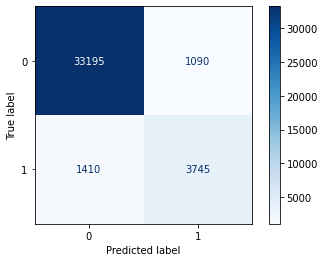

In [65]:
from sklearn.metrics import plot_confusion_matrix #plotting confusion matrix
plot_confusion_matrix(rf, X_test_sc, y_test, cmap='Blues', values_format='d');

Accuracy = Number of correct predictions Total number of predictions

In [66]:
#Accuracy = All correct / all
Accuracy = tp + tn / tp + tn + fp + fn
Accuracy

39448.863818424565

In [76]:
# What is the test specificity of our model?

spec = tn / (tn + fp)

print(f'Specificity: {round(spec,4)}')

Specificity: 0.9682


Test Specificity is the ability of the test to correctly identify those without the disease (true negative rate)

In [68]:
# What is the test sensitivity of our model?

sens = tp / (tp + fn)

print(f'Sensitivity: {round(sens,4)}')

Sensitivity: 0.7265


Test Sensitivity is the ability of a test to correctly identify those with the disease (true positive rate)

In [69]:
rf.predict_proba(X_test)[:10]

#lr.predict_proba(X_test)[:, 0][:10]
#lr.predict_proba(X_test)[:, 1][:10]


# The first row for example...

# 0.99168003 is the probability that the output will be 0 (Basically ~99% probability)
# 0.00831997 is the probability that the output will be 1 (Basically sub 1% probability)

array([[0.04989033, 0.95010967],
       [0.4819113 , 0.5180887 ],
       [0.04989033, 0.95010967],
       [0.04989033, 0.95010967],
       [0.04989033, 0.95010967],
       [0.04989033, 0.95010967],
       [0.4819113 , 0.5180887 ],
       [0.04989033, 0.95010967],
       [0.0453098 , 0.9546902 ],
       [0.04989033, 0.95010967]])

In [71]:
# Let's create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

pred_proba = [i[1] for i in rf.predict_proba(X_test)]

# The value of each y along with the probability of being 1
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

In [72]:
pred_df.head(10)
pred_df.tail(10)

,true_values,pred_probs
89550,0,0.954690
32684,0,0.950110
32273,0,0.518089
21528,0,0.967644
33470,0,0.954690
57468,0,0.954690
16797,0,0.950110
36585,0,0.950110
80305,0,0.893981
108164,0,0.518089


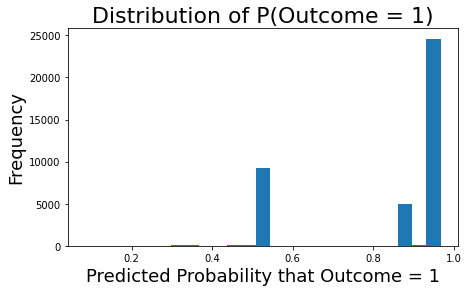

In [73]:
# Create figure.
plt.figure(figsize = (7,4))

# Create histogram of observations.
plt.hist(pred_df['pred_probs'], bins = 25)

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize = 22)
plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize = 18);

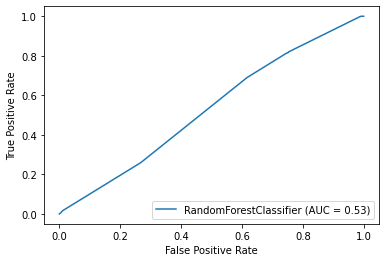

In [74]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_test, y_test);

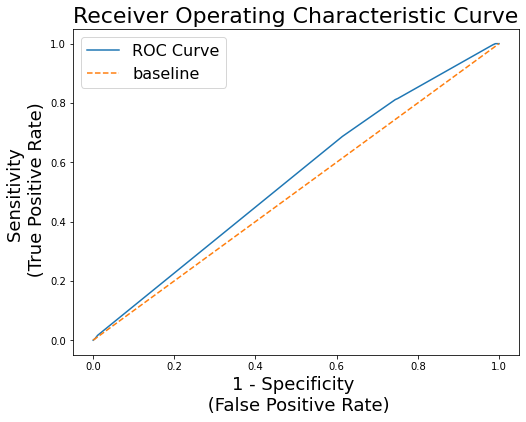

In [75]:
# Create figure.
plt.figure(figsize = (8,6))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity \n (True Positive Rate)', fontsize=18)
plt.xlabel('1 - Specificity \n (False Positive Rate)', fontsize=18)

# Create legend.
plt.legend(fontsize=16);